In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1D Heat conduction for extruded surface example

A very long rod 5mm in diameter has one end maintained at 100$^o$C. The surface of the rod is exposed to ambient air at 25<sup>o</sup>C with a convection heat transfer coefficient of 100 W/m$^2$K.

* Determine the temperature distributions along rods constructed from pure copper, 2024 aluminum alloy, and type AISI 316 stainless steel. What are the corresponding heat losses from the rods?

* Estimate how long the rods must be for the assumption of infinite length to yield an accurate estimate of the heat loss.

# Main assumptions
1. Steady state
2. One dimensional conduction along the rod
3. Constant properties ($k, h, \rho$)
4. Negligible radiation
5. infinitely long rod

In [2]:
## Given information
# Main properties
k_cu = 398 # in W/mK
k_al = 180
k_316 = 14
h = 100

# Temperature
T_b = 100
T_amb = 25

# Geometry
D = 0.005
P = D * np.pi
A_c = D**2 * np.pi / 4

As $L\rightarrow \infty$, $T_L = T_\infty$. Therefore, $q_L = 0$ and $\frac{\partial T}{\partial x} |_{x=L} = 0$. Using these boundary conditions for the heat equation, the temperature profile can be found.

$$ \frac{\theta}{\theta_b} = e^{-mx}$$

Where, $\theta = T - T_\infty$ and $m = \sqrt{\frac{h P} {k A_c}}$. In addition, the heat transfer at the fin is given as follows.

$$ q = \sqrt{h P k A_c} \theta_b$$

In [3]:
def tempProfile(x, m, T_amb, T_b):
    T = (T_b - T_amb) * np.exp(-m*x) + T_amb
    return T

In [4]:
# Calculate m for each material
m_cu = np.sqrt(h*P / (k_cu*A_c))
print('m_cu = {}'.format(m_cu))
m_al = np.sqrt(h*P / (k_al*A_c))
print('m_al = {}'.format(m_al))
m_316 = np.sqrt(h*P / (k_316*A_c))
print('m_316 = {}'.format(m_316))

m_cu = 14.17762410016672
m_al = 21.0818510677892
m_316 = 75.59289460184544


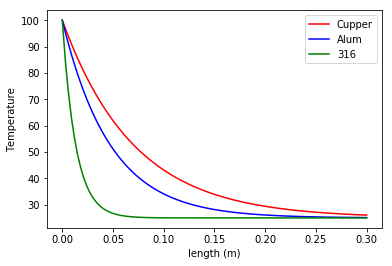

In [5]:
# Plot the temperature profile
L = 0.3
x = np.linspace(0,L,100)
T_cu = tempProfile(x, m_cu, T_amb, T_b)
T_al = tempProfile(x, m_al, T_amb, T_b)
T_316 = tempProfile(x, m_316, T_amb, T_b)
plt.plot(x, T_cu, 'r', x, T_al, 'b', x, T_316, 'g')
plt.legend(['Cupper','Alum','316'])
plt.xlabel('length (m)')
plt.ylabel('Temperature')
plt.show()


In [6]:
# Calculate the heat transfer
def qFin(h, P, k, Ac, Tb, Tamb):
    return np.sqrt(h * P * k * Ac)*(Tb - Tamb)
q_cu = qFin(h, P, k_cu, A_c, T_b, T_amb)
q_al = qFin(h, P, k_al, A_c, T_b, T_amb)
q_316 = qFin(h, P, k_316, A_c, T_b, T_amb)
print('q_cu = {} W'.format(q_cu))
print('q_al = {} W'.format(q_al))
print('q_316 = {} W'.format(q_316))

q_cu = 8.309553397471717 W
q_al = 5.588205899510307 W
q_316 = 1.5584761653873904 W


Infinite long fin assumption is equivalent to Case 2 regardless of the sectional area or shape. Compare the heat loss in two cases,

$$ q = \sqrt{h P k A_c} \theta_b \tanh{mL}$$
$$ q = \sqrt{h P k A_c} \theta_b $$

The condition for the two value is equivalent is $\tanh{mL} \approx 1$. Say $\tanh{mL} \approx 0.99$. Then $mL=2.65$

In [7]:
L_cu_inf = 2.65 / m_cu
L_al_inf = 2.65 / m_al
L_316_inf = 2.65 / m_316

print("L_cu_inf = {}".format(L_cu_inf))
print("L_al_inf = {}".format(L_al_inf))
print("L_316_inf = {}".format(L_316_inf))

L_cu_inf = 0.18691425173057294
L_al_inf = 0.12570053699169306
L_316_inf = 0.03505620487160582
